# HiPy - Using Python for Data Analysis with Pandas and Numpy

## Introduction - Creating Dataframes with Panda

Pandas is a library that introduces dataframes - or tables - to python. This is extremely helpful in data analysis and statistics, where we might want to manage, manipulate and analyse data using computers. We will see later how this is applied in the financial services to automatically graph stock prices by taking data from Google Finance and graphing it using matplotlib.

Dataframes are essentially tables, but are just objects as everything else in python is. Here we make a simple dataframe, with a series of numbers in the entries:

In [1]:
import pandas

myFirstDataframe = pandas.Series([1,1,2,3,5,8])

myFirstDataframe

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int64

We can also change the index by adding an arguement to the series function:

In [2]:
mySecondDataframe = pandas.Series([1,1,2,3,5,8], index=['python','is','great','for','data','analysis!'])

mySecondDataframe

python       1
is           1
great        2
for          3
data         5
analysis!    8
dtype: int64

We can get more columns by using a dictionary. Notice how we can also have dataframes with different types by using different functions, like pandas.Categorical.

In [3]:
bigTable = pandas.DataFrame({'Column 1':1, 'Column 2': 'hello', 'Column 3': pandas.Series([3,1,4,1,5]), 'Column 4':pandas.Categorical(['three', 'one','four','one','five'])})

bigTable

,Column 1,Column 2,Column 3,Column 4
0,1,hello,3,three
1,1,hello,1,one
2,1,hello,4,four
3,1,hello,1,one
4,1,hello,5,five


There are more examples [here.](http://pandas.pydata.org/pandas-docs/stable/dsintro.html)

## Manipulating Dataframes

For analytics, it can be helpful to change how our data is presented to make it easier to get some meaning from the data. For this there are a number of functions. Here are the basics:

In [4]:
bigTable.head(3) #Returns the first 3 rows

,Column 1,Column 2,Column 3,Column 4
0,1,hello,3,three
1,1,hello,1,one
2,1,hello,4,four


In [13]:
bigTable.tail(2) #Returns the last 2 rows

,Column 1,Column 2,Column 3,Column 4
3,1,hello,1,one
4,1,hello,5,five


In [14]:
bigTable.T #Transposes our data

,0,1,2,3,4
Column 1,1,1,1,1,1
Column 2,hello,hello,hello,hello,hello
Column 3,3,1,4,1,5
Column 4,three,one,four,one,five


In [15]:
bigTable.sort_values(by="Column 3") #Sorts our rows by the entries in Column 3 in ascending order

,Column 1,Column 2,Column 3,Column 4
1,1,hello,1,one
3,1,hello,1,one
0,1,hello,3,three
2,1,hello,4,four
4,1,hello,5,five


In [16]:
bigTable["Column 2"] #Gives us only column 2

0    hello
1    hello
2    hello
3    hello
4    hello
Name: Column 2, dtype: object

There are many more examples and commands for manipulating data [here.](http://pandas.pydata.org/pandas-docs/stable/10min.html#selection) This is just scratching the surface of the pandas library! Pandas can also import data from many different data sources, including excel, csv, html and sql files. Below we will look at getting data from online.

## Example: Creating a Stock Chart for Tesla Motors with basic analysis

Coding in financial services has become extremely important because of the speed at which computers can process large amounts of data. In this exercise we are going to use Python to import data from the web to find stock prices and create a simple graph of a stocks price over time.

Before we start, we need to make sure we have pandas_datareader installed - we will be using this module to get data from the web later. To do this, go into the Anaconda Navigator, click "Enviroments", filter the results by "Not Installed" and tick pandas_datareader. Then click apply, and the navigator will install the module with any dependencies.

Now that's set up, it's time to start coding!

First we need to import pandas, pandas_datareader (under the name "web"), matplotlib and datetime.


In [5]:
import pandas
import pandas_datareader.data as web
import matplotlib
import datetime

Say we want to look at the stock price of Telsa Motors over time. To do this we use the pandas_datareader.data (remember, we called this web!) to pull the stock price of TSLA from Google Finance. The web.DataReader function will take two arguements here: "TSLA" to tell the function what stock to look at, and "google" to tell the function where to look for it.

In [6]:
teslaStock = web.DataReader("TSLA", 'google')
print(teslaStock)

              Open    High     Low   Close    Volume
Date                                                
2010-06-29   19.00   25.00   17.54   23.89  18783276
2010-06-30   25.79   30.42   23.30   23.83  17194394
2010-07-01   25.00   25.92   20.27   21.96   8229863
2010-07-02   23.00   23.10   18.71   19.20   5141807
2010-07-06   20.00   20.00   15.83   16.11   6879296
2010-07-07   16.40   16.63   14.98   15.80   6924914
2010-07-08   16.14   17.52   15.57   17.46   7719539
2010-07-09   17.58   17.90   16.55   17.40   4058606
2010-07-12   17.95   18.07   17.00   17.05   2203570
2010-07-13   17.39   18.64   16.90   18.14   2680060
2010-07-14   17.94   20.15   17.76   19.84   4196110
2010-07-15   19.94   21.50   19.00   19.89   3745297
2010-07-16   20.70   21.30   20.05   20.64   2621210
2010-07-19   21.37   22.25   20.92   21.91   2486489
2010-07-20   21.85   21.85   20.05   20.30   1825231
2010-07-21   20.66   20.90   19.50   20.22   1253442
2010-07-22   20.50   21.25   20.37   21.00    

That's a lot of data! Notice how Pandas truncates the middle section so it doesn't fill up our screen with nonsense. We can trim it down to November's stock price by using the datetime module:

In [7]:
start = datetime.date(2016, 11, 1)

end = datetime.date(2016, 11, 30)

teslaStockNov = web.DataReader("TSLA", 'google', start, end)
print(teslaStockNov)

              Open    High     Low   Close   Volume
Date                                               
2016-11-01  198.04  198.50  188.10  190.79  7060036
2016-11-02  190.05  192.70  187.50  188.02  4253382
2016-11-03  189.00  191.47  187.04  187.42  2653023
2016-11-04  189.00  193.46  185.96  190.56  5146043
2016-11-07  193.59  194.29  190.05  193.21  3870112
2016-11-08  193.79  197.49  191.26  194.94  3267580
2016-11-09  186.88  192.00  183.95  190.06  8173065
2016-11-10  191.05  191.61  180.42  185.35  6750341
2016-11-11  184.24  188.88  183.00  188.56  3988504
2016-11-14  188.00  188.25  178.19  181.45  6552205
2016-11-15  182.78  186.43  182.05  183.77  3902018
2016-11-16  182.65  184.73  181.21  183.93  3434437
2016-11-17  183.49  189.49  182.11  188.66  4887067
2016-11-18  190.65  193.00  185.00  185.02  5210347
2016-11-21  185.04  188.89  184.41  184.52  4361043
2016-11-22  185.84  191.47  183.71  191.17  5603361
2016-11-23  190.61  195.64  189.00  193.14  4891893


Great! Now the data looks more manageable. We might not be able to get much information from these number, and it might be better to present them in a graph. To do this, we will use the matplotlib module:

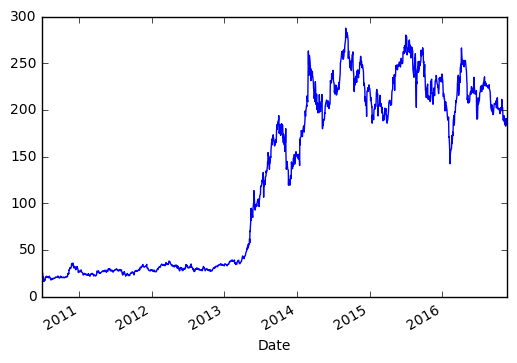

In [8]:
teslaStock["Open"].plot()
matplotlib.pyplot.show()

Nice! We can zoom in on November's stocks by doing the exact same thing just for "teslaStockNov":

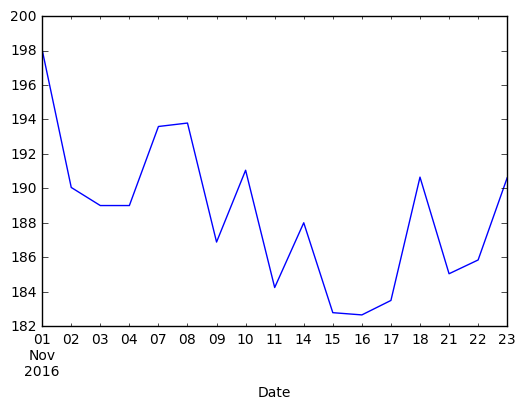

In [9]:
teslaStockNov["Open"].plot()
matplotlib.pyplot.show()

Great! Now let's make a function that has an input of a date and a stock, and outputs the graph of the stock price:

In [10]:
import pandas
import pandas_datareader.data as web
import matplotlib
import time

def stockPriceGraph(start, end, symbol):
    
    startDate = time.strptime(start, "%d %m %Y") #These lines take the input start and end date and converts them to the date and time data types required by the Datareader function 
    endDate = time.strptime(end, "%d %m %Y")

    Stock = web.DataReader(symbol, 'google', startDate, endDate)
    Stock["Open"].plot()
    matplotlib.pyplot.title(str(symbol))
    matplotlib.pyplot.show()

Now we can just use this function to call any stock graph from Google!

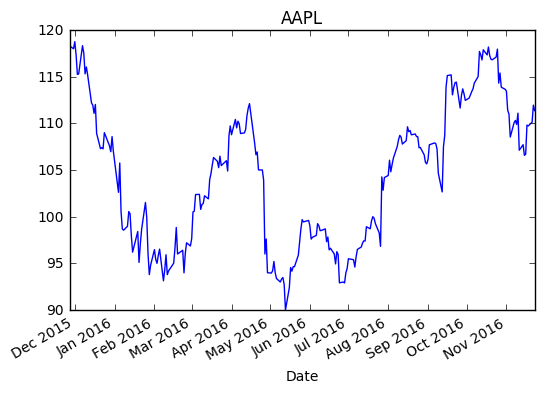

In [11]:
stockPriceGraph("01 01 2001", "01 01 2011", "AAPL")

Don't forget we can use this with the base python functionality - if we have a list of stocks and want to compare the shape of them over a 10 year period our program does all the heavy lifting for us:

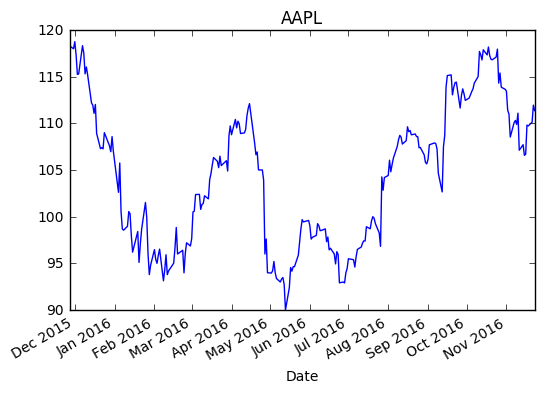

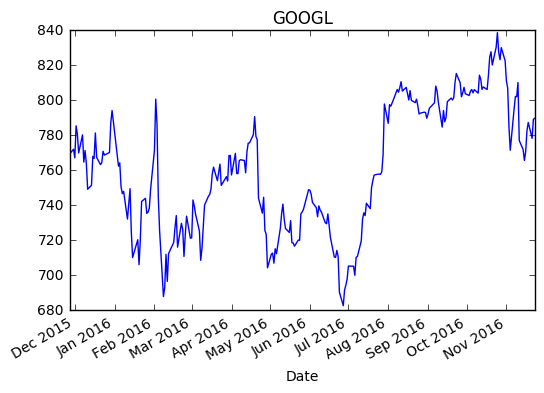

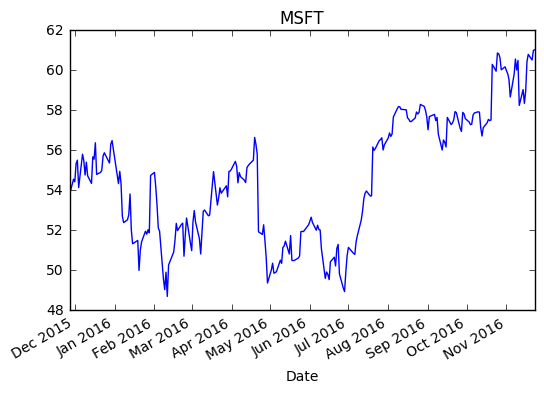

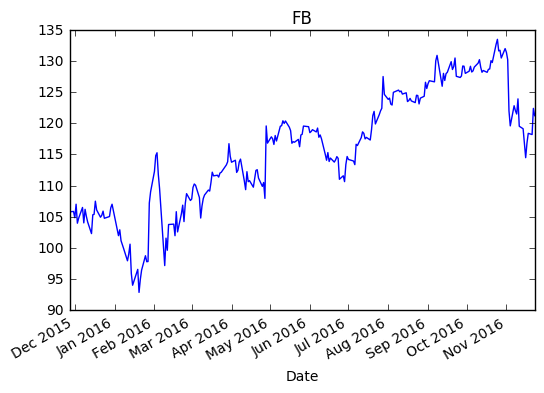

In [12]:
stockList = ["AAPL", "GOOGL", "MSFT", "FB"]
for stock in stockList:
    stockPriceGraph("01 01 2001", "01 01 2011", stock)

This is just the beginning - from here you can analyze the data using Numpy, using thousands of current data points. This is where your knowledge of maths comes in!

## Projects using Pandas

* Using Pandas and Numpy, construct a program that can get a stock price graph, a moving average graph